# Study 07: PTST

In [1]:
%matplotlib widget

In [2]:
import bmcs_utils

In [3]:
import numpy as np
import copy

In [4]:
from ibvpy.tfunction import TimeFunction, TFSelector, TFCyclicSin, TFCyclicNonsymmetricConstant

In [5]:
from bmcs_matmod.slide.slide_explorer import SlideExplorer
import bmcs_utils.api as bu

## Monotonic

In [6]:
%%capture
import numpy as np

# Isotropic hardening
material_params_1 = dict(
    E_T=10000, gamma_T= 4000, K_T=0.000, S_T=000000.01, c_T=2, bartau=5, 
    E_N=25000, S_N=000000.05, c_N = 1, m = 0.08, f_t=5, f_c=150, f_c0=100, eta=0.0)

   
se1 = SlideExplorer(n_steps=500, k_max=50)
se1.slide_model.trait_set(**material_params_1)
se1.trait_set(s_x_1 = 0.4, s_y_1 = 0, w_1 = 0.005);
se1.run()



In [7]:
import matplotlib.pylab as plt
fig, ((ax_1,  ax_2, ax_3), (ax_4, ax_5, ax_6)) = plt.subplots(2,3, tight_layout=True, figsize=(9,4))
fig.canvas.header_visible=False

s_x_pi_1, s_y_pi_1, w_pi_1, z_1, alpha_x_1, alpha_y_1, omega_T_1, omega_N_1 = se1.Eps_arr.T
tau_x_pi_1, tau_y_pi_1, sig_pi_1, Z_1, X_x_1, X_y_1, Y_T_1, Y_N_1 = se1.Sig_arr.T

w_1 = se1.w_t
s_x_1 = se1.s_x_t.T
s_y_1 = se1.s_y_t.T
t = np.linspace(0, 1, len(tau_x_pi_1))
    
ax_1.plot(t, s_x_1)
ax_1.set_xlabel('$time$')
ax_1.set_ylabel('$s_x$')
    
ax_2.plot(s_x_1, omega_T_1)
ax_2.set_xlabel('$s_x$')
ax_2.set_ylabel('$\omega_T$')

ax_3.plot(s_x_1, omega_N_1)
ax_3.set_xlabel('$s_x$')
ax_3.set_ylabel('$\omega_N$')

ax_4.plot(t, w_1)
ax_4.set_xlabel('$time$')
ax_4.set_ylabel('$w_1$')

ax_5.plot(s_x_1, tau_x_pi_1)
ax_5.set_xlabel('$s_x$')
ax_5.set_ylabel('$\sigma_T$')

ax_6.plot(s_x_1, np.abs(sig_pi_1))
ax_6.set_xlabel('$s_x$')
ax_6.set_ylabel('$\sigma_N$')

    
#fig.savefig('Study_05_Energy_dissipation_stress.pdf')   

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, '$\\sigma_N$')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

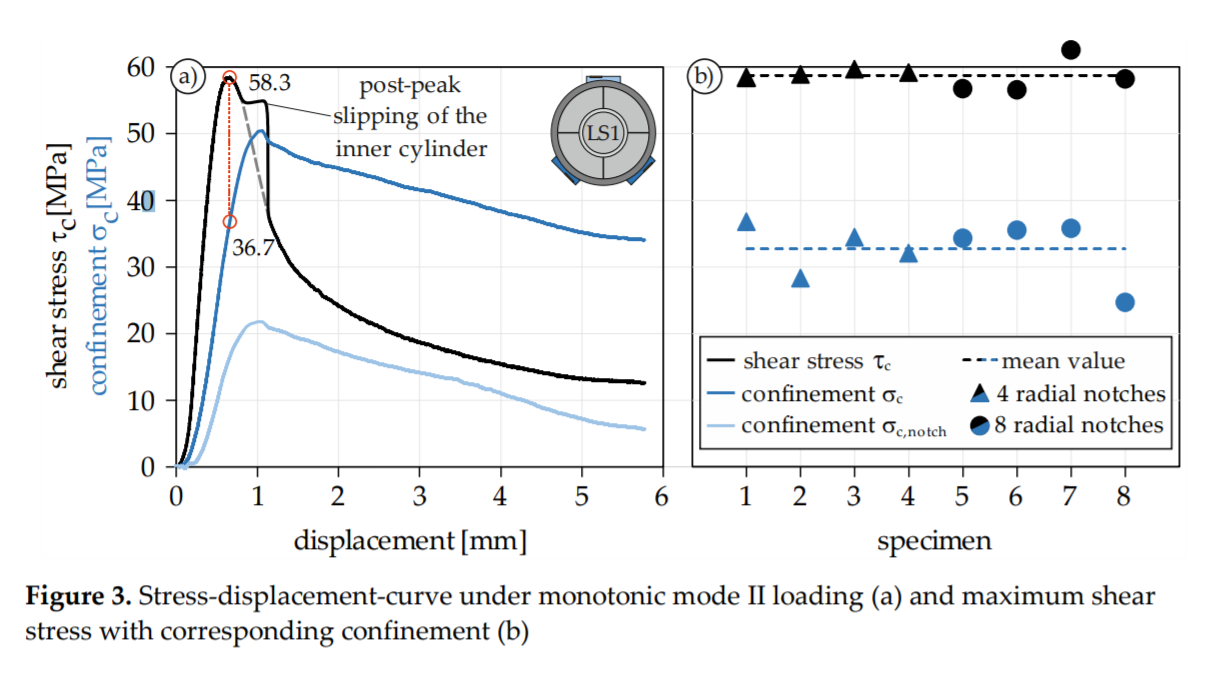

In [8]:
from IPython.display import Image
from IPython.core.display import HTML 

fig, ax_1 = plt.subplots(1,1, tight_layout=True, figsize=(9,4))
fig.canvas.header_visible=False

ax_1.plot(s_x_1, tau_x_pi_1, color='black', label='shear stress')
ax_1.plot(s_x_1, np.abs(sig_pi_1), color='blue', label='confinement')
ax_1.set_xlabel('$s_x$')
ax_1.set_ylabel('$\sigma_T$')
plt.legend()

PATH = "C:/Users/marag/PycharmProjects/bmcs_matmod/notebooks/slide/paper_2021/"
Image( PATH + "Monotic_tests.png")

In [9]:
import matplotlib.pylab as plt
fig, (ax_1, ax_2) = plt.subplots(1,2, tight_layout=True, figsize=(9,4))
fig.canvas.header_visible=False
    
se1.energy_dissipation.plot_energy(ax_1, ax_2)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Cyclic dispplacement controlled

In [10]:
%%capture
import numpy as np

# Isotropic hardening
material_params_1 = dict(
    E_T=10000, gamma_T= 2000, K_T=0.000, S_T=000000.01, c_T=2, bartau=5, 
    E_N=10000, S_N=000000.05, c_N = 1, m = 0.5, f_t=5, f_c=150, f_c0=100, eta=0.0)

   
se1 = SlideExplorer(n_steps=500, k_max=50)
se1.slide_model.trait_set(**material_params_1)
se1.trait_set(s_x_1 = 0.06, s_y_1 = 0, w_1 = 0.001);
se1.run()

se1.trait_set(s_x_1 = 0.05, s_y_1 = 0, w_1 = 0.000);
se1.run()

se1.trait_set(s_x_1 = 0.11, s_y_1 = 0, w_1 = 0.002);
se1.run()

se1.trait_set(s_x_1 = 0.09, s_y_1 = 0, w_1 = 0.00);
se1.run()

se1.trait_set(s_x_1 = 0.2, s_y_1 = 0, w_1 = 0.004);
se1.run()

se1.trait_set(s_x_1 = 0.18, s_y_1 = 0, w_1 = 0.01);
se1.run()

se1.trait_set(s_x_1 = 0.33, s_y_1 = 0, w_1 = 0.005);
se1.run()

se1.trait_set(s_x_1 = 0.3, s_y_1 = 0, w_1 = 0.004);
se1.run()

se1.trait_set(s_x_1 = 0.4, s_y_1 = 0, w_1 = 0.006);
se1.run()



In [11]:
import matplotlib.pylab as plt
fig, ((ax_1,  ax_2, ax_3), (ax_4, ax_5, ax_6)) = plt.subplots(2,3, tight_layout=True, figsize=(9,4))
fig.canvas.header_visible=False

s_x_pi_1, s_y_pi_1, w_pi_1, z_1, alpha_x_1, alpha_y_1, omega_T_1, omega_N_1 = se1.Eps_arr.T
tau_x_pi_1, tau_y_pi_1, sig_pi_1, Z_1, X_x_1, X_y_1, Y_T_1, Y_N_1 = se1.Sig_arr.T

w_1 = se1.w_t
s_x_1 = se1.s_x_t.T
s_y_1 = se1.s_y_t.T
t = np.linspace(0, 1, len(tau_x_pi_1))
    
ax_1.plot(t, s_x_1)
ax_1.set_xlabel('$time$')
ax_1.set_ylabel('$s_x$')
    
ax_2.plot(s_x_1, omega_T_1)
ax_2.set_xlabel('$s_x$')
ax_2.set_ylabel('$\omega_T$')

ax_3.plot(s_x_1, omega_N_1)
ax_3.set_xlabel('$s_x$')
ax_3.set_ylabel('$\omega_N$')

ax_4.plot(t, w_1)
ax_4.set_xlabel('$time$')
ax_4.set_ylabel('$w_1$')

ax_5.plot(s_x_1, tau_x_pi_1)
ax_5.set_xlabel('$s_x$')
ax_5.set_ylabel('$\sigma_T$')

ax_6.plot(s_x_1, sig_pi_1)
ax_6.set_xlabel('$s_x$')
ax_6.set_ylabel('$\sigma_N$')

    
#fig.savefig('Study_05_Energy_dissipation_stress.pdf')   

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, '$\\sigma_N$')

## Cyclic force controlled

In [8]:
import copy
def get_UF_t(F, n_t, material_params_1):

    # total number of DOFs
    n_O = 1
    w_pi_1 = [0,0]
    # Global vectors
    F_ext = np.zeros((n_O,), np.float_)
    F_O = np.zeros((n_O,), np.float_)
    U_k_O = np.zeros((n_O,), dtype=np.float_)
    # Setup the system matrix with displacement constraints
    # Time stepping parameters
    t_aux, t_n1, t_max, t_step = 0, 0, len(F), 1 / n_t
    # Iteration parameters
    k_max, R_acc = 100, 1e-1
    U_t_list = []
    F_t_list = []
    while t_n1 <= t_max - 1:

        F_ext =  1.0 * F[t_n1]
        k = 0
        # Equilibrium iteration loop
        w_pi_1_accepted = copy.deepcopy(w_pi_1[-1])
        se1.trait_set(s_x_1 = U_k_O, s_y_1 = 0, w_1 = w_pi_1_accepted)
        se1.run()
        while k < k_max:
            # Stress and material stiffness
            se2 = copy.deepcopy(se1)
            se2.trait_set(s_x_1 = U_k_O, s_y_1 = 0, w_1 = w_pi_1[-1])
            se2.run()
            tau_x_pi_1, tau_y_pi_1, sig_pi_1, Z_1, X_x_1, X_y_1, Y_T_1, Y_N_1 = se2.Sig_arr.T
            s_x_pi_1, s_y_pi_1, w_pi_1, z_1, alpha_x_1, alpha_y_1, omega_T_1, omega_N_1 = se2.Eps_arr.T
            # Internal force
            F_O = tau_x_pi_1[-1]
            # F_O_int = get_sig_O(sig_ab_int.reshape(1, 3, 3)).reshape(6, )
            # Residuum
            R_O = F_ext - F_O
            # System matrix
            # Convergence criterion
            R_norm = R_O
            
            print(F_ext, 'F_ext')
            print(F_O, 'F_O')
            print(R_O, 'R_O')
            
            delta_U_O = R_O / (material_params_1['E_T'] * (1-omega_T_1[-1]))
            U_k_O += delta_U_O
            print(delta_U_O, 'deltaU')
            print(F_ext, 'F_ext')
            print(F_O, 'F_O')
            if R_norm < R_acc:
                print('reached')
                # Convergence reached
                break
            # Next iteration
            k += 1

        else:
            print('no convergence')
            print(F_ext)
            print(U_k_O)
            break
        U_t_list.append(np.copy(U_k_O))
        F_t_list.append(copy.deepcopy(F_O))

        t_n = t_n1
        t_n1 += 1
    U_t, F_t = np.array(U_t_list), np.array(F_t_list)
    return U_t, F_t

In [9]:
material_params_1 = dict(
    E_T=2000, gamma_T=10000, K_T=10000, S_T=000000.01, c_T=2, bartau=5, 
    E_N=10000, S_N=000000.05, c_N = 1, m = 0.5, f_t=5, f_c=150, f_c0=100, eta=0.0)

   
se1 = SlideExplorer(n_steps=20, k_max=50)
se1.slide_model.trait_set(**material_params_1)

load = 60

S_max1 = 0.9
S_min1 = 0.05
t_steps_cycle = 40
n_cycles1 = 2

first_load = np.concatenate((np.linspace(0, load * S_max1, t_steps_cycle), np.linspace(
        load * S_max1, load * S_min1, t_steps_cycle)[1:]))

cycle1 = np.concatenate(
        (np.linspace(load * S_min1, load * S_max1, t_steps_cycle)[1:], np.linspace(load * S_max1, load * S_min1, t_steps_cycle)[
                                                              1:]))
cycle1 = np.tile(cycle1, n_cycles1 - 1)

sin_load = np.concatenate((first_load, cycle1))

t_steps = len(sin_load)

U, F = get_UF_t(
    sin_load,
    t_steps,
    material_params_1
)
    

<lambdifygenerated-13>:4: RuntimeWarning: divide by zero encountered in double_scalars
  return (select([less((abs(sqrt((-X_x + tau_pi_x/(1 - omega_T))**2 + (-X_y + tau_pi_y/(1 - omega_T))**2)) - (Z + bartau)*(sig_pi/(-omega_N*Dummy_466 + 1) + f_t**2*m/(Z + bartau - 2*f_t*m))*(Z + bartau - 2*f_t*m)/(f_t**2*m))*sign(f_t)*sign(m), 0),less((abs(sqrt((-X_x + tau_pi_x/(1 - omega_T))**2 + (-X_y + tau_pi_y/(1 - omega_T))**2)) + (Z + bartau + f_c0*m)*(sig_pi/(-omega_N*Dummy_466 + 1) + f_c0 - m*(-f_c**2 + 2*f_c*f_c0 - f_c0**2)/(Z + bartau + 2*f_c*m - f_c0*m))*(Z + bartau + 2*f_c*m - f_c0*m)/(m*(-f_c**2 + 2*f_c*f_c0 - f_c0**2)))*sign(m)*sign(-f_c + f_c0), 0),True], [sqrt(((-X_x + tau_pi_x/(1 - omega_T))**2 + (-X_y + tau_pi_y/(1 - omega_T))**2)*(f_t**2*m**2 - 2*f_t*m*(Z + bartau) + (Z + bartau)**2)**2/((Z + bartau)*(-Z - bartau + f_t*m)**2*(Z + bartau - 2*f_t*m)) + (sig_pi/(-omega_N*Dummy_466 + 1) + f_t**2*m/(Z + bartau - 2*f_t*m))**2*(f_t**2*m**2 - 2*f_t*m*(Z + bartau) + (Z + bartau)**2)**2/(f_t

<lambdifygenerated-29>:4: RuntimeWarning: divide by zero encountered in double_scalars
  return (select([less((abs(sqrt((-X_x + tau_pi_x/(1 - omega_T))**2 + (-X_y + tau_pi_y/(1 - omega_T))**2)) - (Z + bartau)*(sig_pi/(-omega_N*Dummy_506 + 1) + f_t**2*m/(Z + bartau - 2*f_t*m))*(Z + bartau - 2*f_t*m)/(f_t**2*m))*sign(f_t)*sign(m), 0),less((abs(sqrt((-X_x + tau_pi_x/(1 - omega_T))**2 + (-X_y + tau_pi_y/(1 - omega_T))**2)) + (Z + bartau + f_c0*m)*(sig_pi/(-omega_N*Dummy_506 + 1) + f_c0 - m*(-f_c**2 + 2*f_c*f_c0 - f_c0**2)/(Z + bartau + 2*f_c*m - f_c0*m))*(Z + bartau + 2*f_c*m - f_c0*m)/(m*(-f_c**2 + 2*f_c*f_c0 - f_c0**2)))*sign(m)*sign(-f_c + f_c0), 0),True], [sqrt(((-X_x + tau_pi_x/(1 - omega_T))**2 + (-X_y + tau_pi_y/(1 - omega_T))**2)*(f_t**2*m**2 - 2*f_t*m*(Z + bartau) + (Z + bartau)**2)**2/((Z + bartau)*(-Z - bartau + f_t*m)**2*(Z + bartau - 2*f_t*m)) + (sig_pi/(-omega_N*Dummy_506 + 1) + f_t**2*m/(Z + bartau - 2*f_t*m))**2*(f_t**2*m**2 - 2*f_t*m*(Z + bartau) + (Z + bartau)**2)**2/(f_t

0.0 F_ext
2.0000000000000003e-06 F_O
-2.0000000000000003e-06 R_O
-1.0000000000000003e-09 deltaU
0.0 F_ext
2.0000000000000003e-06 F_O
reached


<lambdifygenerated-45>:4: RuntimeWarning: divide by zero encountered in double_scalars
  return (select([less((abs(sqrt((-X_x + tau_pi_x/(1 - omega_T))**2 + (-X_y + tau_pi_y/(1 - omega_T))**2)) - (Z + bartau)*(sig_pi/(-omega_N*Dummy_546 + 1) + f_t**2*m/(Z + bartau - 2*f_t*m))*(Z + bartau - 2*f_t*m)/(f_t**2*m))*sign(f_t)*sign(m), 0),less((abs(sqrt((-X_x + tau_pi_x/(1 - omega_T))**2 + (-X_y + tau_pi_y/(1 - omega_T))**2)) + (Z + bartau + f_c0*m)*(sig_pi/(-omega_N*Dummy_546 + 1) + f_c0 - m*(-f_c**2 + 2*f_c*f_c0 - f_c0**2)/(Z + bartau + 2*f_c*m - f_c0*m))*(Z + bartau + 2*f_c*m - f_c0*m)/(m*(-f_c**2 + 2*f_c*f_c0 - f_c0**2)))*sign(m)*sign(-f_c + f_c0), 0),True], [sqrt(((-X_x + tau_pi_x/(1 - omega_T))**2 + (-X_y + tau_pi_y/(1 - omega_T))**2)*(f_t**2*m**2 - 2*f_t*m*(Z + bartau) + (Z + bartau)**2)**2/((Z + bartau)*(-Z - bartau + f_t*m)**2*(Z + bartau - 2*f_t*m)) + (sig_pi/(-omega_N*Dummy_546 + 1) + f_t**2*m/(Z + bartau - 2*f_t*m))**2*(f_t**2*m**2 - 2*f_t*m*(Z + bartau) + (Z + bartau)**2)**2/(f_t

1.3846153846153846 F_ext
-4.1359030627651384e-22 F_O
1.3846153846153846 R_O
0.0006923076923076923 deltaU
1.3846153846153846 F_ext
-4.1359030627651384e-22 F_O


<lambdifygenerated-61>:4: RuntimeWarning: divide by zero encountered in double_scalars
  return (select([less((abs(sqrt((-X_x + tau_pi_x/(1 - omega_T))**2 + (-X_y + tau_pi_y/(1 - omega_T))**2)) - (Z + bartau)*(sig_pi/(-omega_N*Dummy_586 + 1) + f_t**2*m/(Z + bartau - 2*f_t*m))*(Z + bartau - 2*f_t*m)/(f_t**2*m))*sign(f_t)*sign(m), 0),less((abs(sqrt((-X_x + tau_pi_x/(1 - omega_T))**2 + (-X_y + tau_pi_y/(1 - omega_T))**2)) + (Z + bartau + f_c0*m)*(sig_pi/(-omega_N*Dummy_586 + 1) + f_c0 - m*(-f_c**2 + 2*f_c*f_c0 - f_c0**2)/(Z + bartau + 2*f_c*m - f_c0*m))*(Z + bartau + 2*f_c*m - f_c0*m)/(m*(-f_c**2 + 2*f_c*f_c0 - f_c0**2)))*sign(m)*sign(-f_c + f_c0), 0),True], [sqrt(((-X_x + tau_pi_x/(1 - omega_T))**2 + (-X_y + tau_pi_y/(1 - omega_T))**2)*(f_t**2*m**2 - 2*f_t*m*(Z + bartau) + (Z + bartau)**2)**2/((Z + bartau)*(-Z - bartau + f_t*m)**2*(Z + bartau - 2*f_t*m)) + (sig_pi/(-omega_N*Dummy_586 + 1) + f_t**2*m/(Z + bartau - 2*f_t*m))**2*(f_t**2*m**2 - 2*f_t*m*(Z + bartau) + (Z + bartau)**2)**2/(f_t

1.3846153846153846 F_ext
1.3846153846153846 F_O
0.0 R_O
0.0 deltaU
1.3846153846153846 F_ext
1.3846153846153846 F_O
reached


<lambdifygenerated-77>:4: RuntimeWarning: divide by zero encountered in double_scalars
  return (select([less((abs(sqrt((-X_x + tau_pi_x/(1 - omega_T))**2 + (-X_y + tau_pi_y/(1 - omega_T))**2)) - (Z + bartau)*(sig_pi/(-omega_N*Dummy_626 + 1) + f_t**2*m/(Z + bartau - 2*f_t*m))*(Z + bartau - 2*f_t*m)/(f_t**2*m))*sign(f_t)*sign(m), 0),less((abs(sqrt((-X_x + tau_pi_x/(1 - omega_T))**2 + (-X_y + tau_pi_y/(1 - omega_T))**2)) + (Z + bartau + f_c0*m)*(sig_pi/(-omega_N*Dummy_626 + 1) + f_c0 - m*(-f_c**2 + 2*f_c*f_c0 - f_c0**2)/(Z + bartau + 2*f_c*m - f_c0*m))*(Z + bartau + 2*f_c*m - f_c0*m)/(m*(-f_c**2 + 2*f_c*f_c0 - f_c0**2)))*sign(m)*sign(-f_c + f_c0), 0),True], [sqrt(((-X_x + tau_pi_x/(1 - omega_T))**2 + (-X_y + tau_pi_y/(1 - omega_T))**2)*(f_t**2*m**2 - 2*f_t*m*(Z + bartau) + (Z + bartau)**2)**2/((Z + bartau)*(-Z - bartau + f_t*m)**2*(Z + bartau - 2*f_t*m)) + (sig_pi/(-omega_N*Dummy_626 + 1) + f_t**2*m/(Z + bartau - 2*f_t*m))**2*(f_t**2*m**2 - 2*f_t*m*(Z + bartau) + (Z + bartau)**2)**2/(f_t

2.769230769230769 F_ext
1.3846153846153846 F_O
1.3846153846153846 R_O
0.0006923076923076923 deltaU
2.769230769230769 F_ext
1.3846153846153846 F_O


<lambdifygenerated-93>:4: RuntimeWarning: divide by zero encountered in double_scalars
  return (select([less((abs(sqrt((-X_x + tau_pi_x/(1 - omega_T))**2 + (-X_y + tau_pi_y/(1 - omega_T))**2)) - (Z + bartau)*(sig_pi/(-omega_N*Dummy_666 + 1) + f_t**2*m/(Z + bartau - 2*f_t*m))*(Z + bartau - 2*f_t*m)/(f_t**2*m))*sign(f_t)*sign(m), 0),less((abs(sqrt((-X_x + tau_pi_x/(1 - omega_T))**2 + (-X_y + tau_pi_y/(1 - omega_T))**2)) + (Z + bartau + f_c0*m)*(sig_pi/(-omega_N*Dummy_666 + 1) + f_c0 - m*(-f_c**2 + 2*f_c*f_c0 - f_c0**2)/(Z + bartau + 2*f_c*m - f_c0*m))*(Z + bartau + 2*f_c*m - f_c0*m)/(m*(-f_c**2 + 2*f_c*f_c0 - f_c0**2)))*sign(m)*sign(-f_c + f_c0), 0),True], [sqrt(((-X_x + tau_pi_x/(1 - omega_T))**2 + (-X_y + tau_pi_y/(1 - omega_T))**2)*(f_t**2*m**2 - 2*f_t*m*(Z + bartau) + (Z + bartau)**2)**2/((Z + bartau)*(-Z - bartau + f_t*m)**2*(Z + bartau - 2*f_t*m)) + (sig_pi/(-omega_N*Dummy_666 + 1) + f_t**2*m/(Z + bartau - 2*f_t*m))**2*(f_t**2*m**2 - 2*f_t*m*(Z + bartau) + (Z + bartau)**2)**2/(f_t

2.769230769230769 F_ext
2.7692307692307687 F_O
4.440892098500626e-16 R_O
2.220446049250313e-19 deltaU
2.769230769230769 F_ext
2.7692307692307687 F_O
reached


<lambdifygenerated-109>:4: RuntimeWarning: divide by zero encountered in double_scalars
  return (select([less((abs(sqrt((-X_x + tau_pi_x/(1 - omega_T))**2 + (-X_y + tau_pi_y/(1 - omega_T))**2)) - (Z + bartau)*(sig_pi/(-omega_N*Dummy_706 + 1) + f_t**2*m/(Z + bartau - 2*f_t*m))*(Z + bartau - 2*f_t*m)/(f_t**2*m))*sign(f_t)*sign(m), 0),less((abs(sqrt((-X_x + tau_pi_x/(1 - omega_T))**2 + (-X_y + tau_pi_y/(1 - omega_T))**2)) + (Z + bartau + f_c0*m)*(sig_pi/(-omega_N*Dummy_706 + 1) + f_c0 - m*(-f_c**2 + 2*f_c*f_c0 - f_c0**2)/(Z + bartau + 2*f_c*m - f_c0*m))*(Z + bartau + 2*f_c*m - f_c0*m)/(m*(-f_c**2 + 2*f_c*f_c0 - f_c0**2)))*sign(m)*sign(-f_c + f_c0), 0),True], [sqrt(((-X_x + tau_pi_x/(1 - omega_T))**2 + (-X_y + tau_pi_y/(1 - omega_T))**2)*(f_t**2*m**2 - 2*f_t*m*(Z + bartau) + (Z + bartau)**2)**2/((Z + bartau)*(-Z - bartau + f_t*m)**2*(Z + bartau - 2*f_t*m)) + (sig_pi/(-omega_N*Dummy_706 + 1) + f_t**2*m/(Z + bartau - 2*f_t*m))**2*(f_t**2*m**2 - 2*f_t*m*(Z + bartau) + (Z + bartau)**2)**2/(f_

4.153846153846153 F_ext
2.769230769230769 F_O
1.3846153846153841 R_O
0.000692307692307692 deltaU
4.153846153846153 F_ext
2.769230769230769 F_O


<lambdifygenerated-125>:4: RuntimeWarning: divide by zero encountered in double_scalars
  return (select([less((abs(sqrt((-X_x + tau_pi_x/(1 - omega_T))**2 + (-X_y + tau_pi_y/(1 - omega_T))**2)) - (Z + bartau)*(sig_pi/(-omega_N*Dummy_746 + 1) + f_t**2*m/(Z + bartau - 2*f_t*m))*(Z + bartau - 2*f_t*m)/(f_t**2*m))*sign(f_t)*sign(m), 0),less((abs(sqrt((-X_x + tau_pi_x/(1 - omega_T))**2 + (-X_y + tau_pi_y/(1 - omega_T))**2)) + (Z + bartau + f_c0*m)*(sig_pi/(-omega_N*Dummy_746 + 1) + f_c0 - m*(-f_c**2 + 2*f_c*f_c0 - f_c0**2)/(Z + bartau + 2*f_c*m - f_c0*m))*(Z + bartau + 2*f_c*m - f_c0*m)/(m*(-f_c**2 + 2*f_c*f_c0 - f_c0**2)))*sign(m)*sign(-f_c + f_c0), 0),True], [sqrt(((-X_x + tau_pi_x/(1 - omega_T))**2 + (-X_y + tau_pi_y/(1 - omega_T))**2)*(f_t**2*m**2 - 2*f_t*m*(Z + bartau) + (Z + bartau)**2)**2/((Z + bartau)*(-Z - bartau + f_t*m)**2*(Z + bartau - 2*f_t*m)) + (sig_pi/(-omega_N*Dummy_746 + 1) + f_t**2*m/(Z + bartau - 2*f_t*m))**2*(f_t**2*m**2 - 2*f_t*m*(Z + bartau) + (Z + bartau)**2)**2/(f_

4.153846153846153 F_ext
4.153846153846153 F_O
0.0 R_O
0.0 deltaU
4.153846153846153 F_ext
4.153846153846153 F_O
reached


<lambdifygenerated-141>:4: RuntimeWarning: divide by zero encountered in double_scalars
  return (select([less((abs(sqrt((-X_x + tau_pi_x/(1 - omega_T))**2 + (-X_y + tau_pi_y/(1 - omega_T))**2)) - (Z + bartau)*(sig_pi/(-omega_N*Dummy_786 + 1) + f_t**2*m/(Z + bartau - 2*f_t*m))*(Z + bartau - 2*f_t*m)/(f_t**2*m))*sign(f_t)*sign(m), 0),less((abs(sqrt((-X_x + tau_pi_x/(1 - omega_T))**2 + (-X_y + tau_pi_y/(1 - omega_T))**2)) + (Z + bartau + f_c0*m)*(sig_pi/(-omega_N*Dummy_786 + 1) + f_c0 - m*(-f_c**2 + 2*f_c*f_c0 - f_c0**2)/(Z + bartau + 2*f_c*m - f_c0*m))*(Z + bartau + 2*f_c*m - f_c0*m)/(m*(-f_c**2 + 2*f_c*f_c0 - f_c0**2)))*sign(m)*sign(-f_c + f_c0), 0),True], [sqrt(((-X_x + tau_pi_x/(1 - omega_T))**2 + (-X_y + tau_pi_y/(1 - omega_T))**2)*(f_t**2*m**2 - 2*f_t*m*(Z + bartau) + (Z + bartau)**2)**2/((Z + bartau)*(-Z - bartau + f_t*m)**2*(Z + bartau - 2*f_t*m)) + (sig_pi/(-omega_N*Dummy_786 + 1) + f_t**2*m/(Z + bartau - 2*f_t*m))**2*(f_t**2*m**2 - 2*f_t*m*(Z + bartau) + (Z + bartau)**2)**2/(f_

5.538461538461538 F_ext
4.153846153846153 F_O
1.384615384615385 R_O
0.0006923076923076925 deltaU
5.538461538461538 F_ext
4.153846153846153 F_O


<lambdifygenerated-157>:4: RuntimeWarning: divide by zero encountered in double_scalars
  return (select([less((abs(sqrt((-X_x + tau_pi_x/(1 - omega_T))**2 + (-X_y + tau_pi_y/(1 - omega_T))**2)) - (Z + bartau)*(sig_pi/(-omega_N*Dummy_826 + 1) + f_t**2*m/(Z + bartau - 2*f_t*m))*(Z + bartau - 2*f_t*m)/(f_t**2*m))*sign(f_t)*sign(m), 0),less((abs(sqrt((-X_x + tau_pi_x/(1 - omega_T))**2 + (-X_y + tau_pi_y/(1 - omega_T))**2)) + (Z + bartau + f_c0*m)*(sig_pi/(-omega_N*Dummy_826 + 1) + f_c0 - m*(-f_c**2 + 2*f_c*f_c0 - f_c0**2)/(Z + bartau + 2*f_c*m - f_c0*m))*(Z + bartau + 2*f_c*m - f_c0*m)/(m*(-f_c**2 + 2*f_c*f_c0 - f_c0**2)))*sign(m)*sign(-f_c + f_c0), 0),True], [sqrt(((-X_x + tau_pi_x/(1 - omega_T))**2 + (-X_y + tau_pi_y/(1 - omega_T))**2)*(f_t**2*m**2 - 2*f_t*m*(Z + bartau) + (Z + bartau)**2)**2/((Z + bartau)*(-Z - bartau + f_t*m)**2*(Z + bartau - 2*f_t*m)) + (sig_pi/(-omega_N*Dummy_826 + 1) + f_t**2*m/(Z + bartau - 2*f_t*m))**2*(f_t**2*m**2 - 2*f_t*m*(Z + bartau) + (Z + bartau)**2)**2/(f_

5.538461538461538 F_ext
5.494420477000043 F_O
0.044041061461495445 R_O
2.2020868780965052e-05 deltaU
5.538461538461538 F_ext
5.494420477000043 F_O
reached
6.923076923076923 F_ext
5.530365202968828 F_O
1.3927117201080952 R_O
0.0006963685342725835 deltaU
6.923076923076923 F_ext
5.530365202968828 F_O
6.923076923076923 F_ext
6.8081803376697 F_O
0.11489658540722303 R_O
5.745251800262062e-05 deltaU
6.923076923076923 F_ext
6.8081803376697 F_O
6.923076923076923 F_ext
6.901933794777691 F_O
0.02114312829923204 R_O
1.0572460925066874e-05 deltaU
6.923076923076923 F_ext
6.901933794777691 F_O
reached
8.307692307692307 F_ext
6.919186709647249 F_O
1.3885055980450574 R_O
0.0006943131592194461 deltaU
8.307692307692307 F_ext
6.919186709647249 F_O
8.307692307692307 F_ext
8.193263059041838 F_O
0.11442924865046855 R_O
5.722430223259681e-05 deltaU
8.307692307692307 F_ext
8.193263059041838 F_O
8.307692307692307 F_ext
8.286606150004253 F_O
0.02108615768805322 R_O
1.054503577034943e-05 deltaU
8.307692307692307 

31.846153846153847 F_ext
31.685824082317243 F_O
0.1603297638366037 R_O
8.125784223178789e-05 deltaU
31.846153846153847 F_ext
31.685824082317243 F_O
31.846153846153847 F_ext
31.811134767809154 F_O
0.035019078344692645 R_O
1.7753843253017032e-05 deltaU
31.846153846153847 F_ext
31.811134767809154 F_O
reached
33.230769230769226 F_ext
31.83852446760706 F_O
1.392244763162168 R_O
0.0007058836587144953 deltaU
33.230769230769226 F_ext
31.83852446760706 F_O
33.230769230769226 F_ext
33.063760404724704 F_O
0.1670088260445226 R_O
8.480661196649125e-05 deltaU
33.230769230769226 F_ext
33.063760404724704 F_O
33.230769230769226 F_ext
33.193477381465506 F_O
0.037291849303720426 R_O
1.8943356044425142e-05 deltaU
33.230769230769226 F_ext
33.193477381465506 F_O
reached
34.61538461538461 F_ext
33.22246118649699 F_O
1.3929234288876202 R_O
0.0007076269997186556 deltaU
34.61538461538461 F_ext
33.22246118649699 F_O
34.61538461538461 F_ext
34.44104039725826 F_O
0.17434421812635037 R_O
8.87195195415153e-05 deltaU

48.76923076923077 F_ext
50.07692307692307 F_O
-1.3076923076923066 R_O
-0.0007084703499867764 deltaU
48.76923076923077 F_ext
50.07692307692307 F_O
reached
47.46153846153846 F_ext
48.769230769230774 F_O
-1.3076923076923137 R_O
-0.0007084703499867803 deltaU
47.46153846153846 F_ext
48.769230769230774 F_O
reached
46.15384615384615 F_ext
47.46153846153845 F_O
-1.3076923076922995 R_O
-0.0007084703499867726 deltaU
46.15384615384615 F_ext
47.46153846153845 F_O
reached
44.84615384615385 F_ext
46.15384615384616 F_O
-1.3076923076923137 R_O
-0.0007084703499867803 deltaU
44.84615384615385 F_ext
46.15384615384616 F_O
reached
43.53846153846154 F_ext
44.84615384615384 F_O
-1.3076923076922995 R_O
-0.0007084703499867726 deltaU
43.53846153846154 F_ext
44.84615384615384 F_O
reached
42.230769230769226 F_ext
43.53846153846154 F_O
-1.3076923076923137 R_O
-0.0007084703499867803 deltaU
42.230769230769226 F_ext
43.53846153846154 F_O
reached
40.92307692307692 F_ext
42.230769230769226 F_O
-1.3076923076923066 R_O
-

17.384615384615387 F_ext
16.076923076923077 F_O
1.3076923076923102 R_O
0.0007084703499867784 deltaU
17.384615384615387 F_ext
16.076923076923077 F_O
17.384615384615387 F_ext
17.384615384615387 F_O
0.0 R_O
0.0 deltaU
17.384615384615387 F_ext
17.384615384615387 F_O
reached
18.692307692307693 F_ext
17.384615384615387 F_O
1.3076923076923066 R_O
0.0007084703499867764 deltaU
18.692307692307693 F_ext
17.384615384615387 F_O
18.692307692307693 F_ext
18.692307692307697 F_O
-3.552713678800501e-15 R_O
-1.924758820264342e-18 deltaU
18.692307692307693 F_ext
18.692307692307697 F_O
reached
20.0 F_ext
18.69230769230769 F_O
1.3076923076923102 R_O
0.0007084703499867784 deltaU
20.0 F_ext
18.69230769230769 F_O
20.0 F_ext
20.0 F_O
0.0 R_O
0.0 deltaU
20.0 F_ext
20.0 F_O
reached
21.307692307692307 F_ext
20.0 F_O
1.3076923076923066 R_O
0.0007084703499867764 deltaU
21.307692307692307 F_ext
20.0 F_O
21.307692307692307 F_ext
21.30769230769231 F_O
-3.552713678800501e-15 R_O
-1.924758820264342e-18 deltaU
21.30769230

48.76923076923077 F_ext
50.07692307692308 F_O
-1.3076923076923137 R_O
-0.0007085659408338557 deltaU
48.76923076923077 F_ext
50.07692307692308 F_O
reached
47.46153846153846 F_ext
48.76923076923077 F_O
-1.3076923076923066 R_O
-0.0007085659408338519 deltaU
47.46153846153846 F_ext
48.76923076923077 F_O
reached
46.15384615384615 F_ext
47.46153846153845 F_O
-1.3076923076922995 R_O
-0.000708565940833848 deltaU
46.15384615384615 F_ext
47.46153846153845 F_O
reached
44.84615384615385 F_ext
46.15384615384615 F_O
-1.3076923076923066 R_O
-0.0007085659408338519 deltaU
44.84615384615385 F_ext
46.15384615384615 F_O
reached
43.53846153846154 F_ext
44.84615384615385 F_O
-1.3076923076923066 R_O
-0.0007085659408338519 deltaU
43.53846153846154 F_ext
44.84615384615385 F_O
reached
42.230769230769226 F_ext
43.53846153846153 F_O
-1.3076923076923066 R_O
-0.0007085659408338519 deltaU
42.230769230769226 F_ext
43.53846153846153 F_O
reached
40.92307692307692 F_ext
42.230769230769226 F_O
-1.3076923076923066 R_O
-0.0

In [10]:
F

array([2.00000000e-06, 1.38461538e+00, 2.76923077e+00, 4.15384615e+00,
       5.49442048e+00, 6.90193379e+00, 8.28660615e+00, 9.67110038e+00,
       1.10555510e+01, 1.24399520e+01, 1.38242963e+01, 1.52085764e+01,
       1.65927844e+01, 1.79769115e+01, 1.93609486e+01, 2.07448856e+01,
       2.21287113e+01, 2.35124134e+01, 2.48959783e+01, 2.62793906e+01,
       2.76626332e+01, 2.90456865e+01, 3.04285284e+01, 3.18111348e+01,
       3.31934774e+01, 3.45755241e+01, 3.59572382e+01, 3.73385765e+01,
       3.87194906e+01, 4.00999246e+01, 4.14798133e+01, 4.28590811e+01,
       4.42376391e+01, 4.56153830e+01, 4.69921892e+01, 4.83679102e+01,
       4.98120289e+01, 5.11921092e+01, 5.25703339e+01, 5.39473204e+01,
       5.39806216e+01, 5.26923077e+01, 5.13846154e+01, 5.00769231e+01,
       4.87692308e+01, 4.74615385e+01, 4.61538462e+01, 4.48461538e+01,
       4.35384615e+01, 4.22307692e+01, 4.09230769e+01, 3.96153846e+01,
       3.83076923e+01, 3.70000000e+01, 3.56923077e+01, 3.43846154e+01,
      

In [11]:
import matplotlib.pylab as plt
fig, ((ax_1,  ax_2)) = plt.subplots(1,2, tight_layout=True, figsize=(9,4))
fig.canvas.header_visible=False

# s_x_pi_1, s_y_pi_1, w_pi_1, z_1, alpha_x_1, alpha_y_1, omega_T_1, omega_N_1 = se1.Eps_arr.T
# tau_x_pi_1, tau_y_pi_1, sig_pi_1, Z_1, X_x_1, X_y_1, Y_T_1, Y_N_1 = se1.Sig_arr.T

# w_1 = se1.w_t
# s_x_1 = se1.s_x_t.T
# s_y_1 = se1.s_y_t.T
t = np.linspace(0, 1, len(F))
    
ax_1.plot(U, F)
ax_1.set_xlabel('$time$')
ax_1.set_ylabel('$Force$')
    
ax_2.plot(t, U)
ax_2.set_xlabel('$s_x$')
ax_2.set_ylabel('$displacement$')

# ax_3.plot(s_x_1, omega_N_1)
# ax_3.set_xlabel('$s_x$')
# ax_3.set_ylabel('$\omega_N$')

# ax_4.plot(t, w_1)
# ax_4.set_xlabel('$time$')
# ax_4.set_ylabel('$w_1$')

# ax_5.plot(s_x_1, tau_x_pi_1)
# ax_5.set_xlabel('$s_x$')
# ax_5.set_ylabel('$\sigma_T$')

# ax_6.plot(s_x_1, sig_pi_1)
# ax_6.set_xlabel('$s_x$')
# ax_6.set_ylabel('$\sigma_N$')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, '$displacement$')